In [20]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

In [21]:
# Load Dataset
df = pd.read_csv("titanic_sample_for_eda.csv")


In [22]:
# Overview
print("Shape:", df.shape)
print("\\nData Types:\\n", df.dtypes)
print("\\nSummary Statistics:\\n", df.describe(include='all'))

Shape: (10, 12)
\nData Types:\n PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
\nSummary Statistics:\n         PassengerId   Survived     Pclass                     Name   Sex  \
count      10.00000  10.000000  10.000000                       10    10   
unique          NaN        NaN        NaN                       10     2   
top             NaN        NaN        NaN  Braund, Mr. Owen Harris  male   
freq            NaN        NaN        NaN                        1     5   
mean        5.50000   0.500000   2.300000                      NaN   NaN   
std         3.02765   0.527046   0.948683                      NaN   NaN   
min         1.00000   0.000000   1.000000                      NaN   NaN   
25%         3.25000   0.000000   1.250000     

\nMissing Values:\n PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            1
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          7
Embarked       0
dtype: int64


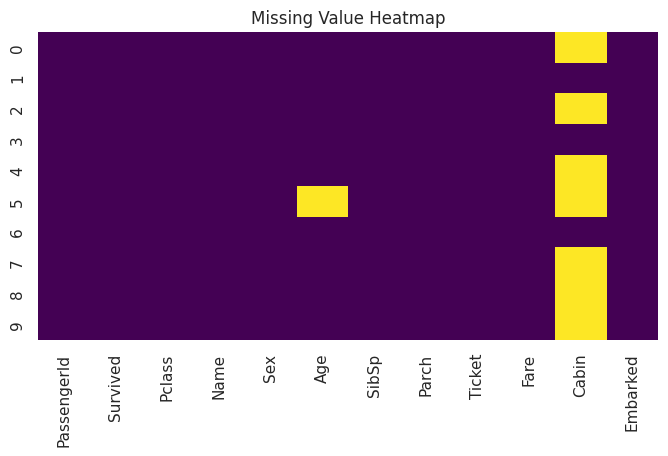

In [23]:
# Missing Values
print("\\nMissing Values:\\n", df.isnull().sum())
plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()

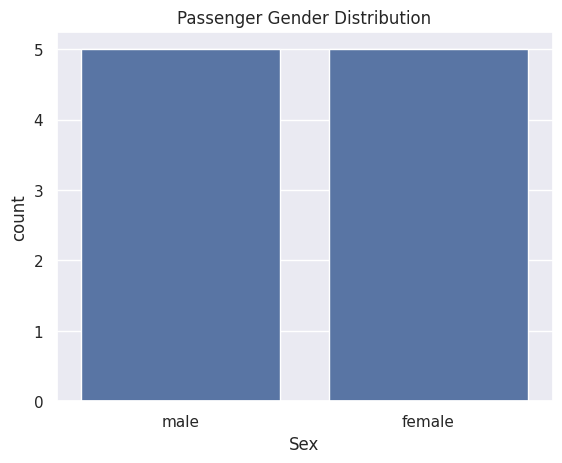

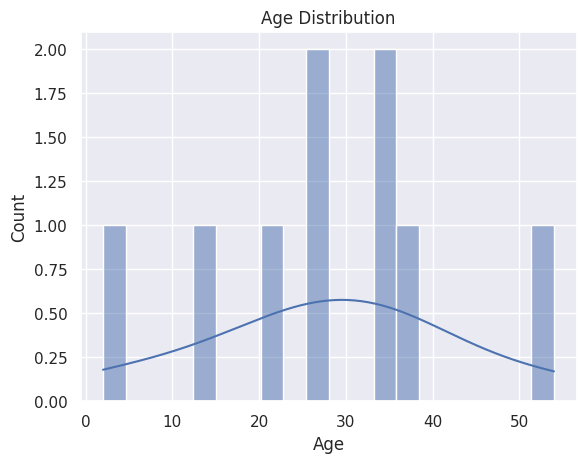

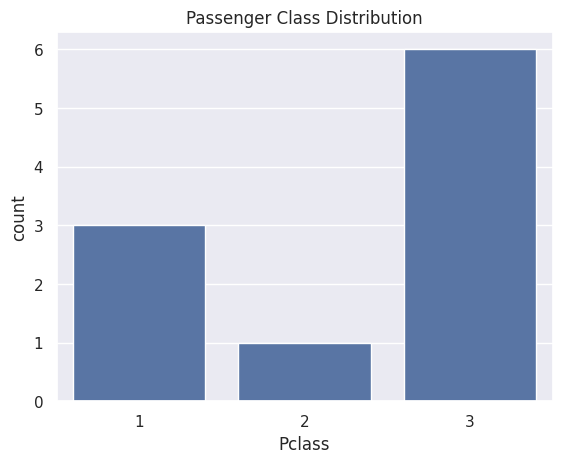

In [24]:
# Univariate Analysis
sns.countplot(x="Sex", data=df)
plt.title("Passenger Gender Distribution")
plt.show()

sns.histplot(df['Age'], kde=True, bins=20)
plt.title("Age Distribution")
plt.show()

sns.countplot(x="Pclass", data=df)
plt.title("Passenger Class Distribution")
plt.show()

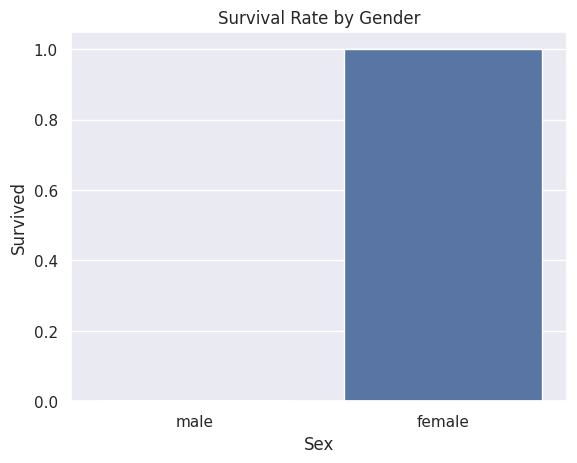

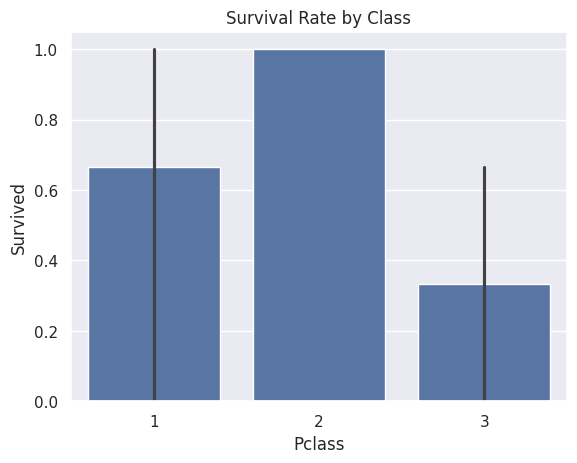

In [25]:
# Bivariate Analysis
sns.barplot(x="Sex", y="Survived", data=df)
plt.title("Survival Rate by Gender")
plt.show()

sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Survival Rate by Class")
plt.show()

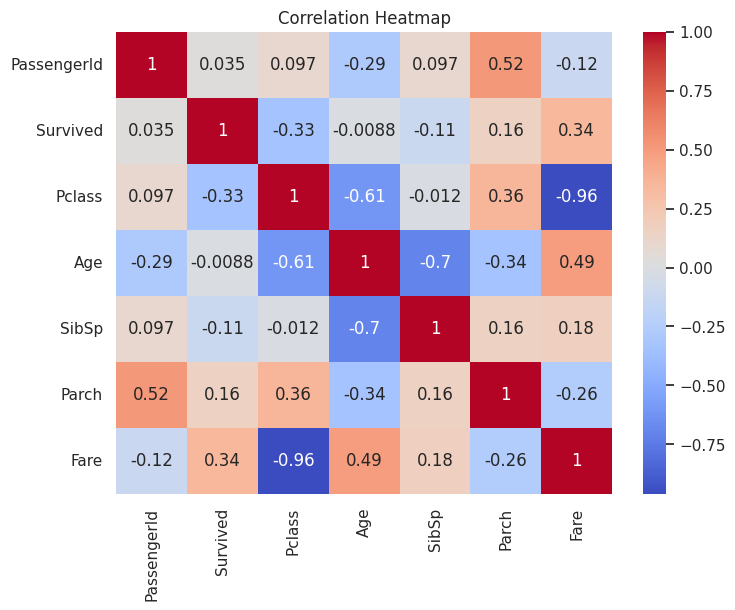

In [26]:
# Correlation Analysis
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

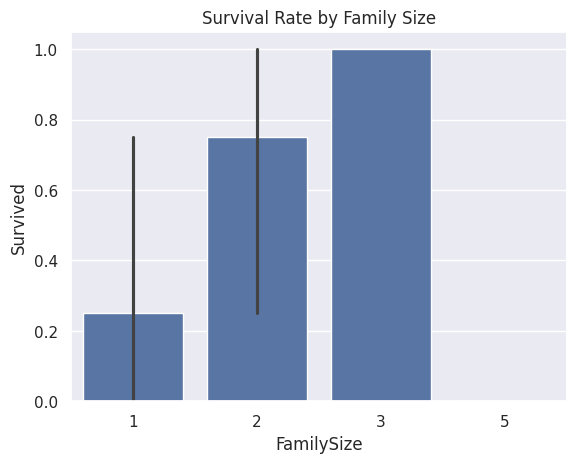

In [27]:
# Feature Engineering
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title("Survival Rate by Family Size")
plt.show()

In [28]:
# Data Cleaning
if 'Age' in df.columns:
    df['Age'].fillna(df['Age'].median(), inplace=True)

columns_to_drop = ['Cabin', 'Ticket', 'Name']
existing_columns = [col for col in columns_to_drop if col in df.columns]
df.drop(columns=existing_columns, inplace=True)

print("\\nCleaned Dataset Preview:")
print(df.head())

\nCleaned Dataset Preview:
   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  \
0            1         0       3    male  22.0      1      0   7.2500   
1            2         1       1  female  38.0      1      0  71.2833   
2            3         1       3  female  26.0      0      0   7.9250   
3            4         1       1  female  35.0      1      0  53.1000   
4            5         0       3    male  35.0      0      0   8.0500   

  Embarked  FamilySize  
0        S           2  
1        C           2  
2        S           1  
3        S           2  
4        S           1  


<ipython-input-28-2e7dfe9821ee>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
